In [22]:
import numpy as np
import matplotlib.pyplot as pl
# assume that r=4 and h=1

In [2]:
def focal_dist(rad,dep):
    f = (rad**2)/(4*dep)
    return f

In [3]:
def surf_area(rad,dep):
    s = ((np.pi*rad)/(6*dep**2))*((4*dep**2+rad**2)**(3/2)-rad**3)
    return s

In [4]:
def cruc_area(rad,dep,d):
    f=focal_dist(rad,dep)
    c=np.pi*(rad*(f-dep-d)/(f-dep))**2
    return c

In [7]:
surf_area(80**(1/2),4)

296.3471503956127

In [8]:
cruc_area(80**(1/2),4,0.9)

2.5132741228718736

In [9]:
focal_dist(10,1)

25.0

In [18]:
def irr_cap(rad,dep,d,alpha,i):
    sa = surf_area(rad,dep)
    sc = cruc_area(rad,dep,d)
    if(sc==0):
        return None
    irr = i*alpha*sa/sc
    return irr

In [11]:
def total_power(rad,dep,alpha,i):
    sa = surf_area(rad,dep)
    p=i*alpha*sa

In [50]:
def tp(sa,alpha,i):
    return i*alpha*sa

In [28]:
dep = 1
alpha = 0.9
solar = 1200 # Watts/meters^2

In [55]:
csa1 = np.zeros((200))
csa2 = np.zeros((200))
csa3 = np.zeros((200))

x1 = np.zeros((200))
x2 = np.zeros((200))
x3 = np.zeros((200))

rad = 5
f=focal_dist(rad,dep)
sa = surf_area(rad,dep)
pg = tp(sa,alpha,solar)

for i in range(200):
    x1[i] = (f/200)*i
    csa1[i] = cruc_area(rad,dep,x1[i]) # value for the crucible surface area / focal surface area

rad = 10
f=focal_dist(rad,dep)
sa = surf_area(rad,dep)
pg = tp(sa,alpha,solar)
    
for i in range(200):
    x2[i] = (f/200)*i
    csa2[i] = cruc_area(rad,dep,x2[i]) # value for the crucible surface area / focal surface area

rad = 15
f=focal_dist(rad,dep)
sa = surf_area(rad,dep)
pg = tp(sa,alpha,solar)
    
for i in range(200):
    x3[i] = (f/200)*i
    csa3[i] = cruc_area(rad,dep,x3[i]) # value for the crucible surface area / focal surface area


In [48]:
jj = np.zeros((200))
for j in range(200):
    jj[j] = 0.1175*j
    ic[j] = irr_cap(rad,dep,jj[j],alpha,solar) # value for the crucible surface area / focal surface area

In [16]:
sa = range(1,100)
for i in range(100):
    pg = tp(sa,0.9,1200)

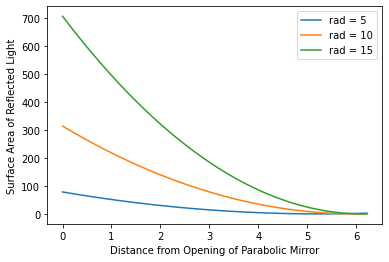

In [57]:
pl.plot(x1,csa1,label = "rad = 5")
pl.plot(x1,csa2,label = "rad = 10")
pl.plot(x1,csa3,label = "rad = 15")

pl.legend()
pl.xlabel('Distance from Opening of Parabolic Mirror')
pl.ylabel('Surface Area of Reflected Light')

pl.show()

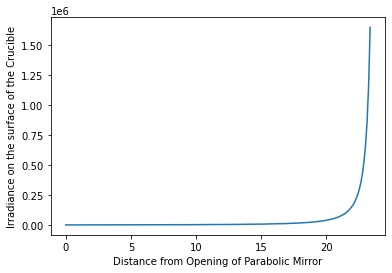

In [58]:
pl.plot(jj,ic)
pl.xlabel('Distance from Opening of Parabolic Mirror')
pl.ylabel('Irradiance on the surface of the Crucible')
pl.show()